In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from ast import literal_eval
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
sns.set_theme(style="whitegrid")
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import RidgeCV
#from sklearn.dummy import DummyRegressor
#from sklearn import metrics, neighbors, linear_model
#from sklearn import neighbors
import json
#from sklearn import linear_model
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100

In [2]:
data_building_15=pd.read_csv('2015-building-energy-benchmarking.csv')
data_building_16=pd.read_csv('2016-building-energy-benchmarking.csv')

In [3]:
feature_15=list(data_building_15)
feature_16=list(data_building_16)
mu_feature=[]
on_feature_15=[]
on_feature_16=[]
for feat in feature_15:
    if feat in feature_16:
        mu_feature.append(feat)
    else:
        on_feature_15.append(feat)
for feat in feature_16:
    if feat not in feature_15:
        on_feature_16.append(feat)
print(len(on_feature_15))
print(len(on_feature_16))

10
9


In [4]:
for i in on_feature_15:
    print(i)

Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats
Zip Codes


In [5]:
for i in on_feature_16:
    print(i)

Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


In [6]:
data_building_15=pd.concat([data_building_15.drop(['Location'],axis=1),data_building_15['Location'].map(literal_eval).apply(pd.Series)],axis=1)
data_building_15=pd.concat([data_building_15.drop(['human_address'],axis=1),data_building_15['human_address'].map(literal_eval).apply(pd.Series)],axis=1)

data_building_15.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101


In [7]:
data_building_15.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude','address': 'Address',
                   'city': 'City','state': 'State','zip': 'ZipCode'}, inplace=True)
data_building_15[data_building_15['OSEBuildingID']==19584]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
691,19584,2015,NonResidential,Other,SAND POINT COUNTRY CLUB,325049004,4,NORTHEAST,1928,1,3.0,39971,0,39971,"Office, Other, Retail Store, Swimming Pool",Other,36185.0,Retail Store,3142.0,Office,644.0,NaN,NaN,257.8,271.6,460.0,464.8,10303305.0,10855626.0,0.0,1061099.0,3620620.0,66828.0,6682834.0,0.0,380.17,9.12,No,NaN,Compliant,NaN,129.0,55.0,2.0,48.0,18792,47.68939742,-122.26969106,8333 55TH AVE NE,SEATTLE,WA,98115


In [8]:
data_building_15.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions','GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'}, inplace=True)


In [9]:
data_building_15=data_building_15.drop(['2010 Census Tracts'],axis=1)
data_building_15=data_building_15.drop(['City Council Districts'],axis=1)
data_building_15=data_building_15.drop(['Comment'],axis=1)
data_building_15=data_building_15.drop(['Zip Codes'],axis=1)
data_building_16=data_building_16.drop(['Comments'],axis=1)
data_building_15=data_building_15.drop(['OtherFuelUse(kBtu)','Seattle Police Department Micro Community Policing Plan Areas',
                                        'SPD Beats'],axis=1)

In [10]:
data_building=pd.concat([data_building_15,data_building_16],axis=0,ignore_index=True)

data_building.head(4)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101


In [11]:
data_building['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [12]:
data_building['BuildingAge'] = data_building['DataYear'] - data_building['YearBuilt']

In [13]:
data=data_building[~data_building['BuildingType'].str.contains('Multifamily')]

In [14]:
data=data[data['Outlier'].isnull()]
data=data.drop(['Outlier'],axis=1)
data.head(4)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode,BuildingAge
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101,88
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101,19
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101,46
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121,35


In [15]:
data['Neighborhood'] = data['Neighborhood'].str.upper()
data['PropertyName'] = data['PropertyName'].str.upper()
data['Address'] = data['Address'].str.upper()
data['City'] = data['City'].str.upper()

In [16]:
data.loc[data['Neighborhood']=="DELRIDGE NEIGHBORHOODS",['Neighborhood']]='DELRIDGE'

In [17]:
data["OSEBuildingID"] = data["OSEBuildingID"].astype(str)+"_"+ data["DataYear"].astype(str)
data.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode,BuildingAge
0,1_2015,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101,88


In [18]:
data=data.astype({'Latitude': 'float64','Longitude': 'float64'})

In [19]:
Data=data
data=data[['OSEBuildingID', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
           'PropertyGFABuilding(s)', 'PrimaryPropertyType', 
           'ENERGYSTARScore','BuildingType','Latitude', 'Longitude', 'Address', 'BuildingAge',
           'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

In [20]:
data['type_road']=data['Address'].str[-6:]
data.loc[data['Address'].str.contains('PLACE'),['type_road']]='Place'
data.loc[data['type_road'].str.contains('PL'),['type_road']]='Place'
data.loc[data['Address'].str.contains('PLAZ'),['type_road']]='Place'
data.loc[data['type_road'].str.contains('AVE'),['type_road']]='Avenue'
data.loc[data['Address'].str.contains('AVENUE'),['type_road']]='Avenue'
data.loc[data['Address'].str.contains('AV'),['type_road']]='Avenue'
data.loc[data['Address'].str.contains('BLVD'),['type_road']]='Boulevard'
data.loc[data['type_road'].str.contains('WAY'),['type_road']]='Way'
data.loc[data['Address'].str.contains('WAY'),['type_road']]='Way'
data.loc[data['type_road'].str.contains('WY'),['type_road']]='Way'
data.loc[data['Address'].str.contains('DRIVE'),['type_road']]='Drive'
data.loc[data['type_road'].str.contains('DR'),['type_road']]='Drive'
data.loc[data['Address'].str.contains('ROAD'),['type_road']]='Road'
data.loc[data['type_road'].str.contains('RD'),['type_road']]='Road'
data.loc[((data['type_road']!='Way')&(data['type_road']!= 'Avenue')& 
          (data['type_road']!='Drive')& (data['type_road']!= 'Boulevard')& 
          (data['type_road']!='Road')& (data['type_road']!= 'Place')),['type_road']]='Street'

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_36074/1746648059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_road']=data['Address'].str[-6:]


In [21]:
data_road = data.groupby('type_road', as_index=False).agg(Count=('OSEBuildingID','count'),
                                                          Building_Age=('BuildingAge','mean'), 
                                                          SiteEnergyUse= ('SiteEnergyUse(kBtu)','mean'),
                                                          TotalGHGEmissions=('TotalGHGEmissions','mean'))
data_road

,type_road,Count,Building_Age,SiteEnergyUse,TotalGHGEmissions
0,Avenue,1834,55.464013,8.955445e+06,181.623113
1,Boulevard,10,60.600000,8.211751e+06,271.651000
2,Drive,7,52.857143,2.266692e+06,61.018571
3,Place,33,53.848485,7.603621e+06,166.496667
4,Road,63,57.682540,1.586664e+07,544.640952
5,Street,926,52.759179,6.035915e+06,141.226436
6,Way,397,47.901763,7.611582e+06,187.152879


In [22]:
otherr=['Boulevard','Drive','Place','Road']
for i in otherr:
    data.loc[data['type_road']==i,['type_road']]='Other'
data_road = data.groupby('type_road', as_index=False).agg(Count=('OSEBuildingID','count'),
                                                          Building_Age=('BuildingAge','mean'), 
                                                          SiteEnergyUse= ('SiteEnergyUse(kBtu)','mean'),
                                                          TotalGHGEmissions=('TotalGHGEmissions','mean'))
data_road

,type_road,Count,Building_Age,SiteEnergyUse,TotalGHGEmissions
0,Avenue,1834,55.464013,8.955445e+06,181.623113
1,Other,113,56.522124,1.193365e+07,380.092124
2,Street,926,52.759179,6.035915e+06,141.226436
3,Way,397,47.901763,7.611582e+06,187.152879


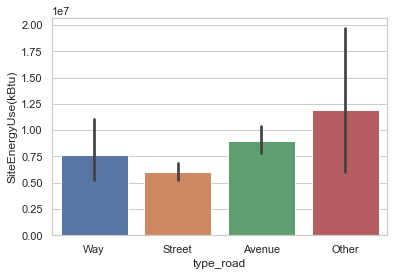

In [27]:
ax = sns.barplot(x="type_road", y="SiteEnergyUse(kBtu)", data=data)

In [28]:
data_mainprop = data.groupby('PrimaryPropertyType', as_index=False).agg(Count=('OSEBuildingID','count'),
                                                          Building_Age=('BuildingAge','mean'), 
                                                          SiteEnergyUse= ('SiteEnergyUse(kBtu)','mean'),
                                                          TotalGHGEmissions=('TotalGHGEmissions','mean'))

In [29]:
otherr=data_mainprop[data_mainprop['Count']>180]['PrimaryPropertyType'].unique()
boucle=data['PrimaryPropertyType'].unique()
Data=data
for i in boucle:
    if i not in otherr:
        data.loc[data['PrimaryPropertyType']==i,['PrimaryPropertyType']]='Other'
data['PrimaryPropertyType'].unique()

array(['Other', 'Mixed Use Property', 'K-12 School',
       'Small- and Mid-Sized Office', 'Large Office', 'Retail Store',
       'Non-Refrigerated Warehouse', 'Warehouse'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Mixed Use Property'),
  Text(2, 0, 'K-12 School'),
  Text(3, 0, 'Small- and Mid-Sized Office'),
  Text(4, 0, 'Large Office'),
  Text(5, 0, 'Retail Store'),
  Text(6, 0, 'Non-Refrigerated Warehouse'),
  Text(7, 0, 'Warehouse')])

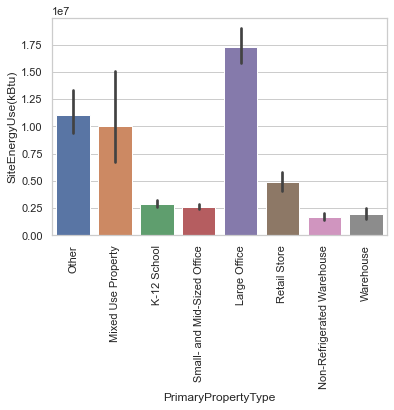

In [32]:
ax = sns.barplot(x="PrimaryPropertyType", y="SiteEnergyUse(kBtu)", data=data)
plt.xticks(rotation= 90)

In [ ]:
data=pd.concat([data.drop(['type_road'],axis=1),pd.get_dummies(data['type_road'],prefix='RT')],axis=1)
data=data.drop(['Address'],axis=1)
data.head(1)

In [ ]:
data=pd.concat([data.drop(['PrimaryPropertyType'],axis=1),pd.get_dummies(data['PrimaryPropertyType'],prefix='PP')],axis=1)

In [ ]:
data.loc[data['PropertyGFABuilding(s)']>data['PropertyGFATotal'],['PropertyGFABuilding(s)']]=data['PropertyGFATotal']
data.loc[data['PropertyGFABuilding(s)']<0,['PropertyGFABuilding(s)']]=data['PropertyGFATotal']
data[data['PropertyGFABuilding(s)']<0]

In [ ]:
data[data['OSEBuildingID'].str.contains('29551')]

In [ ]:
X=data.drop(columns=['OSEBuildingID', 'Neighborhood','BuildingType',
                         'SiteEnergyUse(kBtu)','TotalGHGEmissions'])
y=data[['SiteEnergyUse(kBtu)','TotalGHGEmissions']]
y_pre=y[y['TotalGHGEmissions'].isnull()]
X_pre=X[y['TotalGHGEmissions'].isnull()]
X=X[y['TotalGHGEmissions'].notnull()]
y=y[y['TotalGHGEmissions'].notnull()]

In [ ]:
from sklearn.impute import KNNImputer
X1=X
imputer = KNNImputer(n_neighbors=4)
X1=imputer.fit_transform(X1)
X1 = pd.DataFrame(X1, columns = X.columns,index=X.index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y,train_size=0.8 ,random_state=42)

In [ ]:
data_test=pd.concat([X_test,y_test],axis=1)
data_train=pd.concat([X_train,y_train],axis=1)
#data_test.to_csv("data_test.csv",index=False)
#data_train.to_csv("data_train.csv",index=False) 

In [ ]:
sns.scatterplot(data=data, x="ENERGYSTARScore", y="TotalGHGEmissions")

In [ ]:
X.head(2)

In [ ]:
sns.histplot(data=data, x="NumberofBuildings")

In [ ]:
sns.histplot(data=data, x="NumberofFloors")